# Presentation

## Run this notebook to create the visuals for the slide deck in Presentation

In [33]:
# Imports
import cabi.viz as v
import cabi.etl.get_data as gd
import cabi.geometry as geo
import requests
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## Slide 3, Cabi Stations Mapped on ANC Map

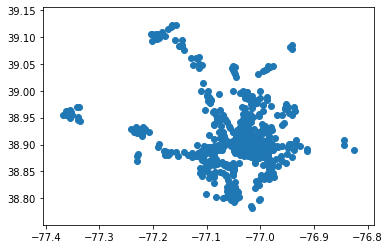

In [2]:
# Load The Stations

curr_station_df = gd.load_station_info()
curr_station_df

coords = geo.point_series(curr_station_df['lon'], curr_station_df['lat'], 'coord_station', curr_station_df['name'])

station_coords = curr_station_df.merge(coords,
                                       on='name')

station_coords = station_coords.drop(\
                                    ['region_id', 'lat', 'lon'], axis = 1)

station_coords = gpd.GeoDataFrame(station_coords, geometry='coord_station')

station_coords.plot()


In [2]:
stations = geo.station_coords()
stations

,name,coord_station
0,Eads St & 15th St S,POINT (-77.05323 38.85897)
1,18th St & S Eads St,POINT (-77.05332 38.85725)
2,Crystal Dr & 20th St S,POINT (-77.04923 38.85643)
3,Crystal Dr & 15th St S,POINT (-77.04959 38.86017)
4,Aurora Hills Cmty Ctr / 18th St & S Hayes St,POINT (-77.05949 38.85787)
...,...,...
597,Eisenhower Ave & Ike Dr,POINT (-77.08246 38.80274)
598,Capitol Ave & Kendall St NE,POINT (-76.98585 38.91099)
599,14th & D St SE,POINT (-76.98639 38.88406)
600,Half & Water St SW,POINT (-77.01055 38.86628)


In [3]:
stations['dc'] = stations.coord_station.map(geo.in_dc)
stations

,name,coord_station,dc
0,Eads St & 15th St S,POINT (-77.05323 38.85897),False
1,18th St & S Eads St,POINT (-77.05332 38.85725),False
2,Crystal Dr & 20th St S,POINT (-77.04923 38.85643),False
3,Crystal Dr & 15th St S,POINT (-77.04959 38.86017),False
4,Aurora Hills Cmty Ctr / 18th St & S Hayes St,POINT (-77.05949 38.85787),False
...,...,...,...
597,Eisenhower Ave & Ike Dr,POINT (-77.08246 38.80274),False
598,Capitol Ave & Kendall St NE,POINT (-76.98585 38.91099),True
599,14th & D St SE,POINT (-76.98639 38.88406),True
600,Half & Water St SW,POINT (-77.01055 38.86628),True


In [25]:
dc_stations = stations[stations['dc']]
dc_stations = dc_stations.set_crs("EPSG:4326")
dc_stations = dc_stations.to_crs(epsg=3857)

In [6]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [8]:
import contextily as ctx
from cabi.etl.get_data import anc_gdf

In [9]:
gdf = anc_gdf()

In [21]:
gdf = gdf.set_crs("EPSG:4326")

In [22]:
gdf = gdf.to_crs(epsg=3857)

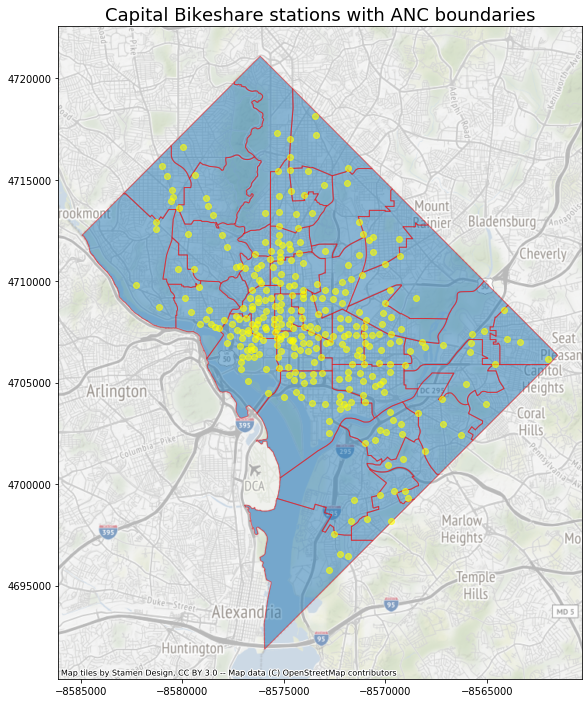

In [56]:
fig, ax = plt.subplots(figsize=(10,12))
gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor='red', ax=ax)
ax.set_aspect('equal')
ctx.add_basemap(ax, alpha=0.5)
dc_stations.plot(ax=ax, color='yellow', alpha=0.6)
ax.set_title('Capital Bikeshare stations with ANC boundaries', fontsize=18)
# fig.savefig('../figures/stationsByANC.png')
plt.show();